In [1]:
import yfinance as yf
import html5lib
import modin.pandas as pd
import pandas as pds
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
spdr_xlk = yf.Ticker('xlk')
print(spdr_xlk)

yfinance.Ticker object <XLK>


In [3]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [4]:
spdr_xlk.info

{'previousClose': 78.59,
 'regularMarketOpen': 79.64,
 'twoHundredDayAverage': 87.778465,
 'trailingAnnualDividendYield': 0.010433897,
 'payoutRatio': None,
 'volume24Hr': None,
 'regularMarketDayHigh': 81.7,
 'navPrice': 78.62,
 'averageDailyVolume10Day': 35259933,
 'totalAssets': 24922689536,
 'regularMarketPreviousClose': 78.59,
 'fiftyDayAverage': 88.11853,
 'trailingAnnualDividendRate': 0.82,
 'open': 79.64,
 'toCurrency': None,
 'averageVolume10days': 35259933,
 'expireDate': None,
 'yield': 0.012,
 'algorithm': None,
 'dividendRate': None,
 'exDividendDate': None,
 'beta': None,
 'circulatingSupply': None,
 'startDate': None,
 'regularMarketDayLow': 79.39,
 'priceHint': 2,
 'currency': 'USD',
 'regularMarketVolume': 11189815,
 'lastMarket': None,
 'maxSupply': None,
 'openInterest': None,
 'marketCap': None,
 'volumeAllCurrencies': None,
 'strikePrice': None,
 'averageVolume': 20526398,
 'priceToSalesTrailing12Months': None,
 'dayLow': 79.39,
 'ask': 81.46,
 'ytdReturn': None,
 

In [5]:
xlk_df = spdr_xlk.history(period='max')
xlk_df.shape

(5351, 7)

In [6]:
xlk_df.tail(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-03-24,74.66,77.67,74.36,77.61,37664500,0.0,0
2020-03-25,78.20,81.09,76.02,77.51,28740400,0.0,0
2020-03-26,78.49,82.51,78.30,82.31,28212900,0.0,0
2020-03-27,79.76,81.26,78.25,78.59,29240600,0.0,0
2020-03-30,79.64,81.73,79.39,81.71,11201031,0.0,0


In [7]:
xlk_df = pd.DataFrame({'ds':xlk_df.index
                       , 'y': xlk_df.Close
                      }).reset_index(drop=True)._to_pandas()

In [8]:
xlk_df.head()

,ds,y
0,1998-12-22,25.01
1,1998-12-23,25.61
2,1998-12-24,25.51
3,1998-12-28,25.58
4,1998-12-29,25.65


In [9]:
from fbprophet import Prophet

In [10]:
xlk_model = Prophet(interval_width = 0.95)
xlk_model.fit(xlk_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
xlk_forecast = xlk_model.make_future_dataframe(periods=50
                                               , freq='D'
                                              )
xlk_forecast = xlk_model.predict(xlk_forecast)

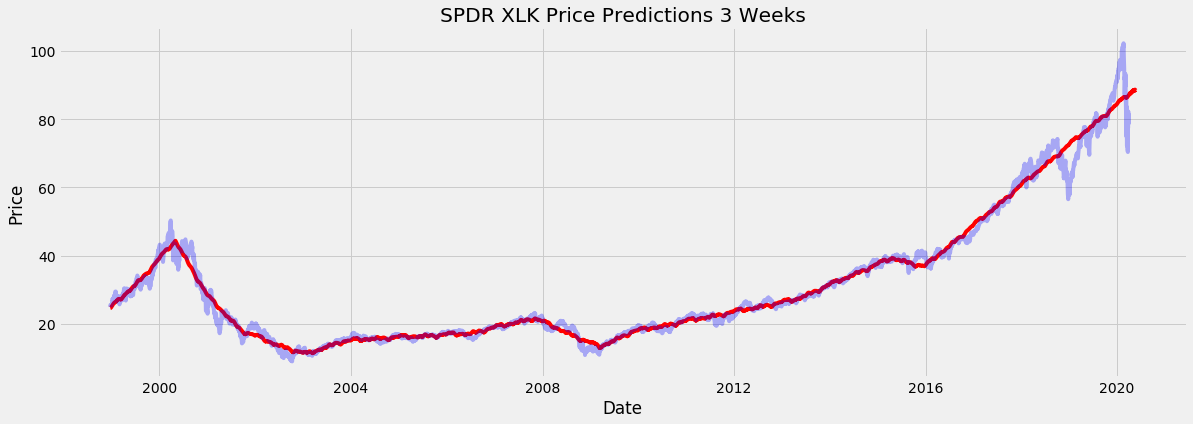

In [12]:
plt.figure(figsize=(18,6))
plt.plot(xlk_forecast.ds
         , xlk_forecast.yhat
         , 'r-'
        )
plt.plot(xlk_df.ds
         , xlk_df.y
         , 'b-'
         , alpha=0.3
        )
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SPDR XLK Price Predictions 3 Weeks');

In [13]:
xlk_forecast[-50:]

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
5351,2020-03-31,87.319521,82.799521,91.519922,87.319521,87.319521,-0.174783,-0.174783,-0.174783,-0.038926,-0.038926,-0.038926,-0.135857,-0.135857,-0.135857,0.0,0.0,0.0,87.144738
5352,2020-04-01,87.351878,83.011312,91.642538,87.351878,87.351878,-0.180703,-0.180703,-0.180703,-0.059962,-0.059962,-0.059962,-0.120741,-0.120741,-0.120741,0.0,0.0,0.0,87.171175
5353,2020-04-02,87.384235,82.764776,91.226317,87.384235,87.384235,-0.136133,-0.136133,-0.136133,-0.028527,-0.028527,-0.028527,-0.107606,-0.107606,-0.107606,0.0,0.0,0.0,87.248102
5354,2020-04-03,87.416591,82.406917,91.545988,87.416591,87.416591,-0.164529,-0.164529,-0.164529,-0.068021,-0.068021,-0.068021,-0.096508,-0.096508,-0.096508,0.0,0.0,0.0,87.252062
5355,2020-04-04,87.448948,83.320338,91.581207,87.448948,87.448948,0.044144,0.044144,0.044144,0.131572,0.131572,0.131572,-0.087428,-0.087428,-0.087428,0.0,0.0,0.0,87.493092
5356,2020-04-05,87.481305,83.137850,92.002439,87.481305,87.481305,0.051295,0.051295,0.051295,0.131572,0.131572,0.131572,-0.080277,-0.080277,-0.080277,0.0,0.0,0.0,87.532600
5357,2020-04-06,87.513661,83.043942,91.595115,87.513661,87.513661,-0.142611,-0.142611,-0.142611,-0.067707,-0.067707,-0.067707,-0.074904,-0.074904,-0.074904,0.0,0.0,0.0,87.371050
5358,2020-04-07,87.546018,83.382920,91.825082,87.546018,87.546018,-0.110032,-0.110032,-0.110032,-0.038926,-0.038926,-0.038926,-0.071106,-0.071106,-0.071106,0.0,0.0,0.0,87.435986
5359,2020-04-08,87.578375,82.985259,91.848010,87.578375,87.578375,-0.128597,-0.128597,-0.128597,-0.059962,-0.059962,-0.059962,-0.068635,-0.068635,-0.068635,0.0,0.0,0.0,87.449777
5360,2020-04-09,87.610731,83.087592,91.923230,87.610731,87.610731,-0.095741,-0.095741,-0.095741,-0.028527,-0.028527,-0.028527,-0.067214,-0.067214,-0.067214,0.0,0.0,0.0,87.514991


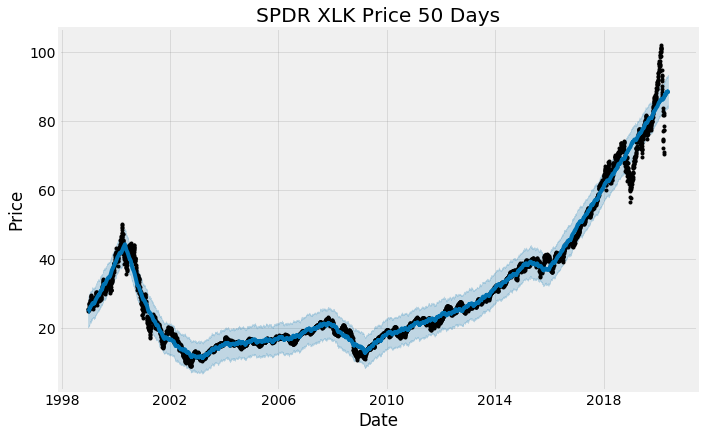

In [14]:
xlk_model.plot(xlk_forecast
               , xlabel='Date'
               , ylabel='Price'
              )
plt.title('SPDR XLK Price 50 Days');